## ***(x,y) 데이터를 이용해 이차방정식의 계수 추정하기***

In [ ]:
! pip install transformers pyqt5 tensorflow==2.5.0 scikit-learn matplotlib numpy

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


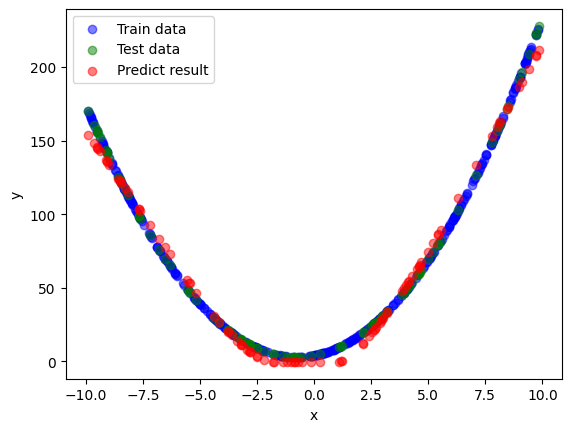

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# 이 부분을 10, 100, 500, 1000 으로 조정하면서 테스트
data_size = 500

# 데이터 생성: y = 2x^2 + 3x + 4
np.random.seed(42)
x = np.random.uniform(-10, 10, data_size).reshape(-1, 1)
y = 2 * x**2 + 3 * x + 4  # y는 2x^2 + 3x + 4의 형태로 생성된 데이터

# 학습 데이터와 테스트 데이터를 8:2 비율로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 딥러닝 모델 정의 및 학습
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=500, verbose=0)

# 테스트 데이터에 대한 예측
y_pred_test = model.predict(x_test)

# 원본 데이터와 예측 결과 시각화 (훈련 데이터와 테스트 데이터 구분)
plt.scatter(x_train, y_train, color='blue', label='Train data', alpha=0.5)
plt.scatter(x_test, y_test, color='Green', label='Test data', alpha=0.5)
plt.scatter(x_test, y_pred_test, color='Red', label='Predict result', alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


## ***Tokenizer 다운로드***

In [ ]:
from transformers import PreTrainedTokenizerFast

tokenizer = PreTrainedTokenizerFast.from_pretrained("skt/kogpt2-base-v2",bos_token='</s>', eos_token='</s>', unk_token='<unk>',pad_token='<pad>', mask_token='<mask>')
tokenizer.save_pretrained("./my_tokenizer")

## ***Tokenizer를 이용해 문장을 숫자로 변환하기***

In [ ]:
# 입력 문장
text = "산책을 나가볼까요?"

# 토큰화 및 ID 변환
tokens = tokenizer.tokenize(text)
token_ids = tokenizer.convert_tokens_to_ids(tokens)

print(tokens)
print(token_ids)

## ***vocab 들여다보기: Tokenizer가 문장을 숫자로 변환하는 체계***

In [ ]:
import json

with open('./my_tokenizer/tokenizer.json', 'r') as f:
    j = json.load(f)

j